In [2]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../../plume_dynamic_analyzer/src/')

from plume_utils import remove_all_0_plume
from viz import show_images
from PlumeDataset import plume_dataset

## same condition: YG056, YG063 - 100 mTorr, 1.6 J/cm^2

In [3]:
df_condition = pd.read_excel('../../data/Sample log.xlsx', sheet_name='SRO')
df_condition = df_condition.loc[[27, 34, 35, 36], ['Growth', 'Pressure (mTorr)', 'Temperature (C)', 'Fluence (J/cm2)', 'Repetation rate (Hz)']]
df_condition.replace('700 (heater O)', 700, inplace=True)
df_condition.replace('650 (heater O)', 650, inplace=True)
df_condition['Growth'] = df_condition['Growth'].str.replace(r'LYW_YCG', 'YG', regex=True)
df_condition

,Growth,Pressure (mTorr),Temperature (C),Fluence (J/cm2),Repetation rate (Hz)
27,YG056,100.0,700.0,1.6,5.0
34,YG063,100.0,700.0,1.6,5.0
35,YG064,100.0,700.0,1.6,5.0
36,YG065,100.0,NaN,1.6,5.0


In [26]:
df_plume_all = []
for key in df_condition['Growth'].unique():
    file = glob.glob(f'../../data/Plumes/SRO_plume_metrics/{key}*.csv')[0]
    print(file)
    df = pd.read_csv(file, index_col=0)
    # df.drop('index', axis=1, inplace=True)
    df['Threshold'].astype(str)
    df[df['Threshold']=='200']
    df = remove_all_0_plume(df.reset_index(), metric='Area', viz=False)
    df_plume_all.append(df)
df_plume_all = pd.concat(df_plume_all, ignore_index=True)
df_plume_all

# df_merged_hotcore = pd.merge(df_condition, df_plume_all, on='Growth')
# df_merged_hotcore

../../data/Plumes/SRO_plume_metrics\YG056_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG063_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG064_metrics.csv
../../data/Plumes/SRO_plume_metrics\YG065_metrics.csv


,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth
0,0,0,0,0.0,0.0,200,YG056
1,0,1,0,0.0,0.0,200,YG056
2,0,2,72,144000000.0,2005.0,200,YG056
3,0,3,122,100000000.0,6529.0,200,YG056
4,0,4,148,52000000.0,11016.0,200,YG056
...,...,...,...,...,...,...,...
375931,14,123,321,0.0,0.0,flexible,YG065
375932,14,124,321,0.0,0.0,flexible,YG065
375933,14,125,321,0.0,0.0,flexible,YG065
375934,14,126,321,0.0,0.0,flexible,YG065


In [36]:
mean_area = df_plume_all.groupby(['Growth', 'time_index'])['Area'].mean().reset_index()
mean_area = mean_area.rename(columns={'Area': 'Mean_Area'})
mean_area.sample(5)

,Growth,time_index,Mean_Area
216,YG063,88,419.459220
33,YG056,33,20285.435185
283,YG064,27,26319.956211
194,YG063,66,108.361702
123,YG056,123,5.063272


In [37]:
df_plume_all_mean_area = pd.merge(df_plume_all, mean_area, on=['Growth', 'time_index'])
df_plume_all_mean_area.sample(5)

,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth,Area_normalized,Mean_Area
98540,182,13,219,16000000.0,4806.0,flexible,YG063,13.143213,20241.218085
72667,93,112,208,0.0,0.0,200,YG056,0.000000,6.549383
124326,23,36,297,0.0,33735.0,flexible,YG063,81.798519,8301.596631
267026,162,35,336,0.0,16.0,5,YG064,0.045724,19162.294013
356881,123,115,383,0.0,0.0,flexible,YG064,0.000000,0.090259


In [41]:
df_plume_all['Area_normalized'] = df_plume_all['Area'] / df_plume_all_mean_area['Mean_Area']
df_plume_all.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df_plume_all.fillna(0, inplace=True)
df_plume_all

,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth,Area_normalized
0,0,0,0,0.0,0.0,200,YG056,0.0
1,0,1,0,0.0,0.0,200,YG056,0.0
2,0,2,72,144000000.0,2005.0,200,YG056,0.0
3,0,3,122,100000000.0,6529.0,200,YG056,0.0
4,0,4,148,52000000.0,11016.0,200,YG056,0.0
...,...,...,...,...,...,...,...,...
375931,14,123,321,0.0,0.0,flexible,YG065,0.0
375932,14,124,321,0.0,0.0,flexible,YG065,0.0
375933,14,125,321,0.0,0.0,flexible,YG065,0.0
375934,14,126,321,0.0,0.0,flexible,YG065,0.0


### viz plume stablity

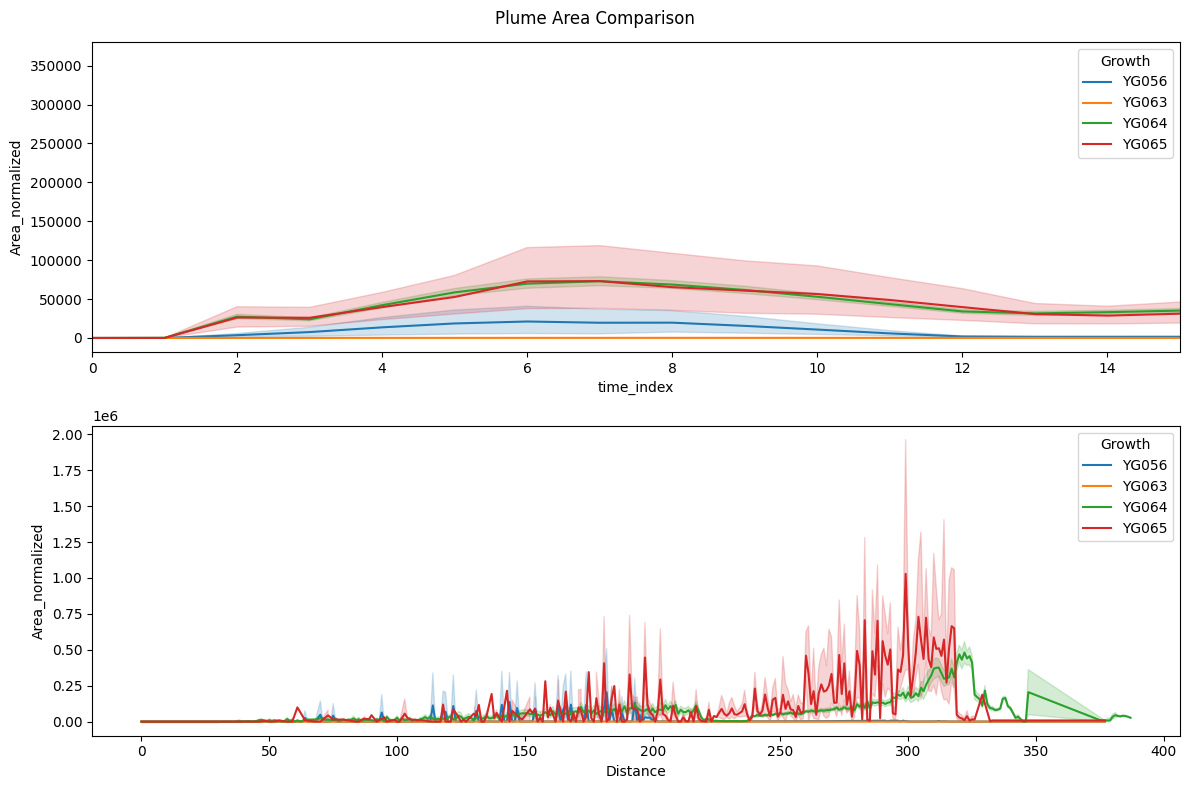

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Area_normalized", hue='Growth', data=df_plume_all, ax=axes[0])
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="Distance", y="Area_normalized", hue='Growth', data=df_plume_all, ax=axes[1])
plt.suptitle('Plume Area Comparison')
plt.tight_layout()
plt.show()

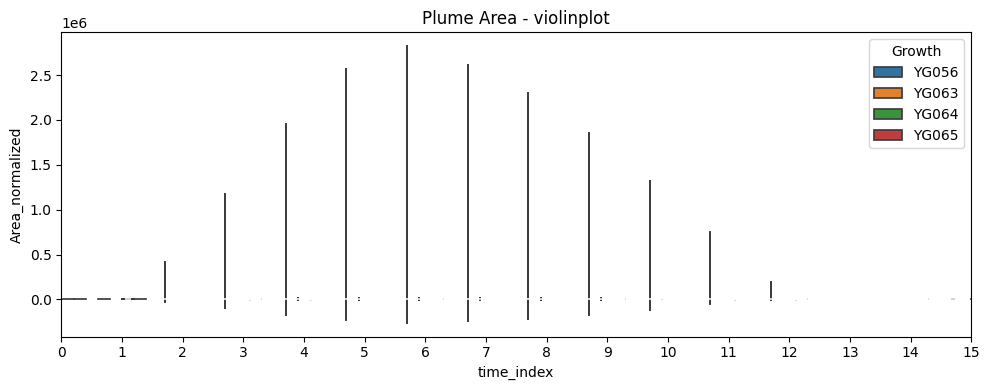

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x='time_index', y='Area_normalized', hue='Growth', data=df_plume_all[df_plume_all['Threshold']=='200'])
ax.set_title('Plume Area - violinplot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

In [42]:
df_plume_all

,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth,Area_normalized
0,0,0,0,0.0,0.0,200,YG056,0.0
1,0,1,0,0.0,0.0,200,YG056,0.0
2,0,2,72,144000000.0,2005.0,200,YG056,0.0
3,0,3,122,100000000.0,6529.0,200,YG056,0.0
4,0,4,148,52000000.0,11016.0,200,YG056,0.0
...,...,...,...,...,...,...,...,...
375931,14,123,321,0.0,0.0,flexible,YG065,0.0
375932,14,124,321,0.0,0.0,flexible,YG065,0.0
375933,14,125,321,0.0,0.0,flexible,YG065,0.0
375934,14,126,321,0.0,0.0,flexible,YG065,0.0


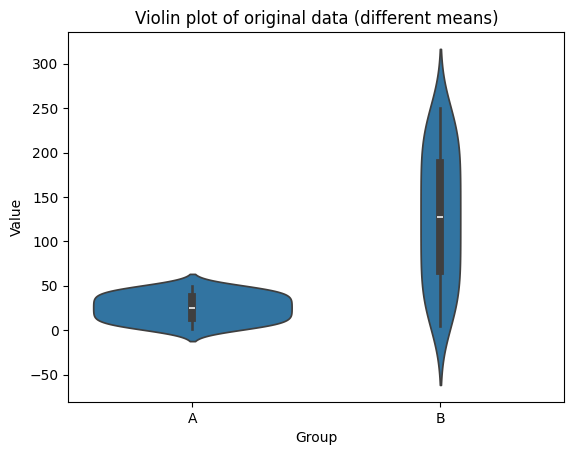

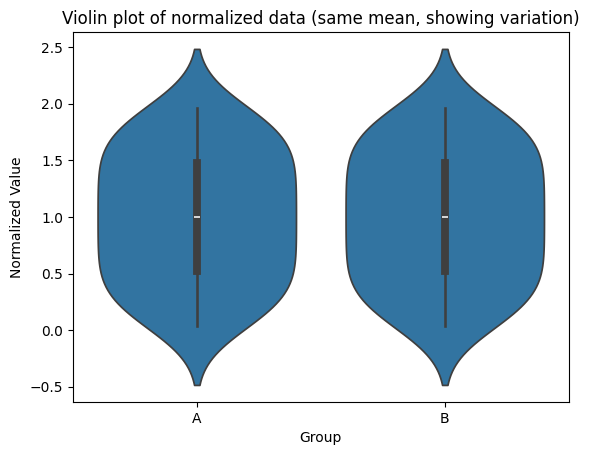

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    'Group': ['A']*50 + ['B']*50,
    'Value': [1 + x for x in range(50)] + [5 + 5*x for x in range(50)]
})

# Normalize the data (centering around the mean)
df['Normalized Value'] = df.groupby('Group')['Value'].transform(lambda x: x / x.mean())

# Plot violin plot on normalized data
sns.violinplot(x='Group', y='Value', data=df)
plt.title("Violin plot of original data (different means)")
plt.show()

# Plot violin plot on normalized data
sns.violinplot(x='Group', y='Normalized Value', data=df)
plt.title("Violin plot of normalized data (same mean, showing variation)")
plt.show()


In [44]:
df_plume_all

,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth
0,0,0,0,0.0,0.0,200,YG056
1,0,1,0,0.0,0.0,200,YG056
2,0,2,72,144000000.0,2005.0,200,YG056
3,0,3,122,100000000.0,6529.0,200,YG056
4,0,4,148,52000000.0,11016.0,200,YG056
...,...,...,...,...,...,...,...
370555,377,123,383,0.0,0.0,flexible,YG064
370556,377,124,383,0.0,0.0,flexible,YG064
370557,377,125,383,0.0,0.0,flexible,YG064
370558,377,126,383,0.0,0.0,flexible,YG064


In [43]:
df_plume_all['Area']df_plume_all['Area'][df_plume_all['time_index']==10].mean()

25368.76303972366

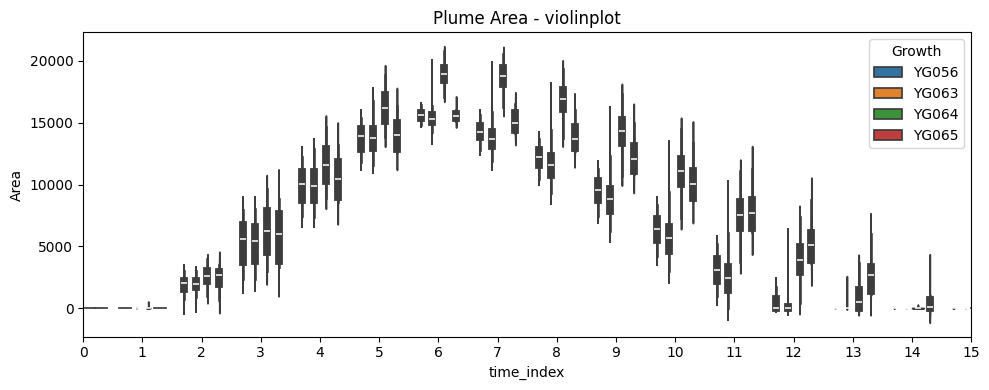

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x='time_index', y='Area', hue='Growth', data=df_plume_all[df_plume_all['Threshold']=='200'])
# for flier in ax.collections[::2]:
#     flier.set_alpha(0.3)
ax.set_title('Plume Area - violinplot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

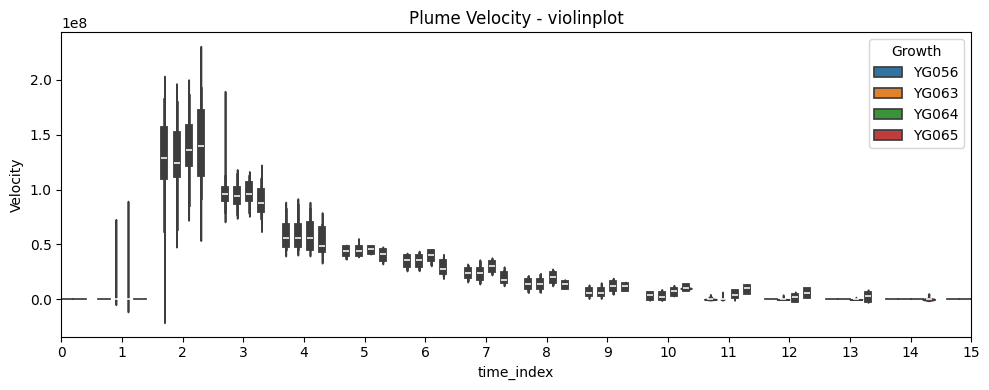

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x='time_index', y='Velocity', hue='Growth', data=df_plume_all[df_plume_all['Threshold']=='200'])
# for flier in ax.collections[::2]:
#     flier.set_alpha(0.3)
ax.set_title('Plume Velocity - violinplot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

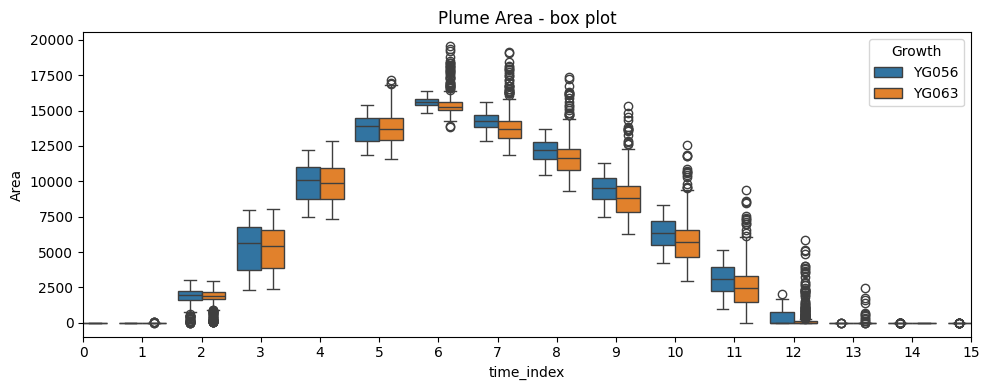

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.boxplot(x='time_index', y='Area', hue='Growth', data=df_plume_all[df_plume_all['Threshold']=='200'])
# for flier in ax.collections[::2]:
#     flier.set_alpha(0.3)
ax.set_title('Plume Area - box plot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

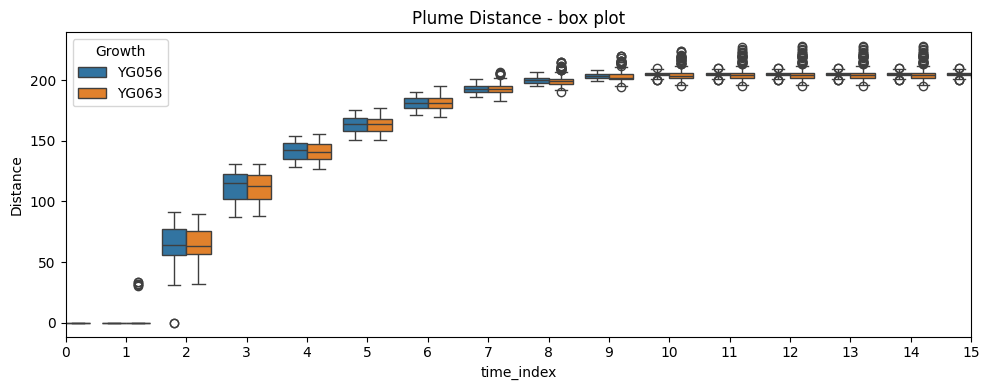

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.boxplot(x='time_index', y='Distance', hue='Growth', data=df_plume_all[df_plume_all['Threshold']=='200'])
# for flier in ax.collections[::2]:
#     flier.set_alpha(0.3)
ax.set_title('Plume Distance - box plot')
ax.set_xlim(0, 15)
plt.tight_layout()
plt.show()

#### lineplot stability

In [27]:
df_plume_all_200 = df_plume_all[df_plume_all['Threshold']=='200']

In [21]:
# Select every nth plume (e.g., every 10th plume)
nth = 20
sampled_plumes = df_plume_all['plume_index'].unique()[::nth]  # Select every nth plume
df_plume_all_sampled = df_plume_all[df_plume_all['plume_index'].isin(sampled_plumes)]  # Filter the DataFrame for the sampled plumes

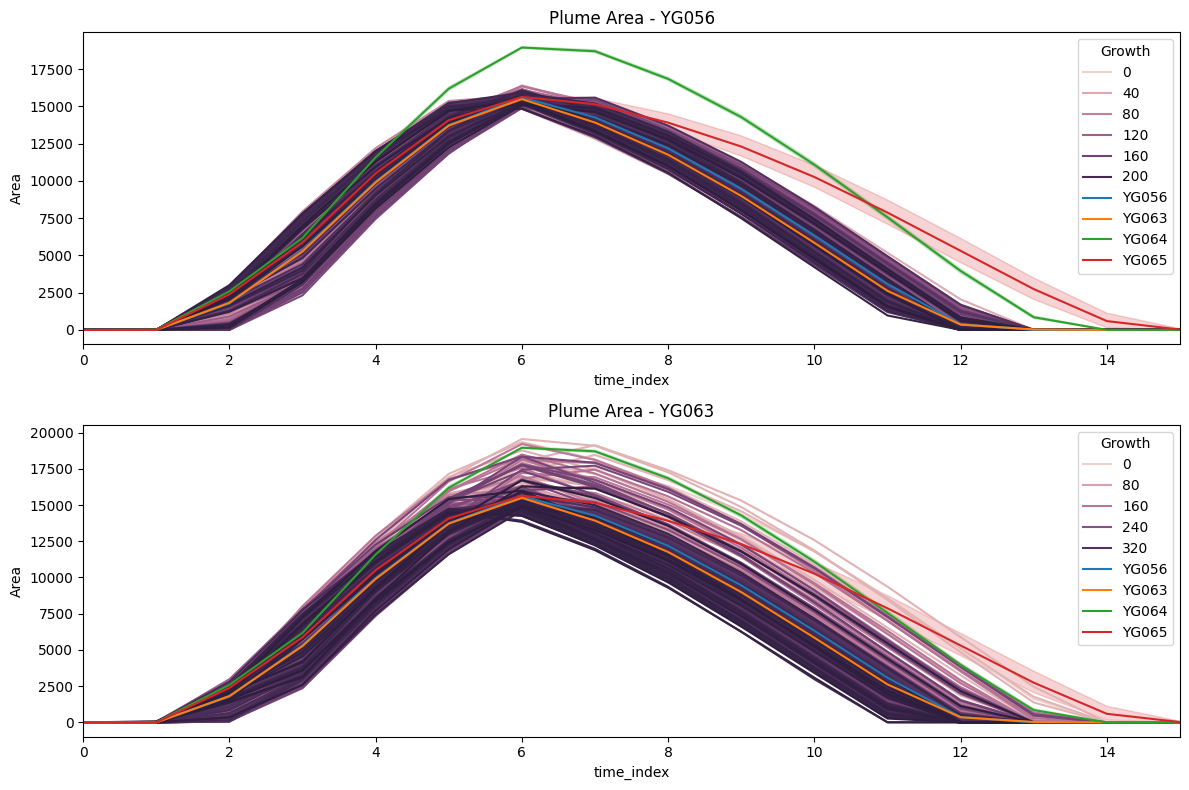

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG056'], ax=axes[0])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[0])
axes[0].set_title('Plume Area - YG056')
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG063'], ax=axes[1])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[1])
axes[1].set_title('Plume Area - YG063')
axes[1].set_xlim(0, 15)

plt.tight_layout()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

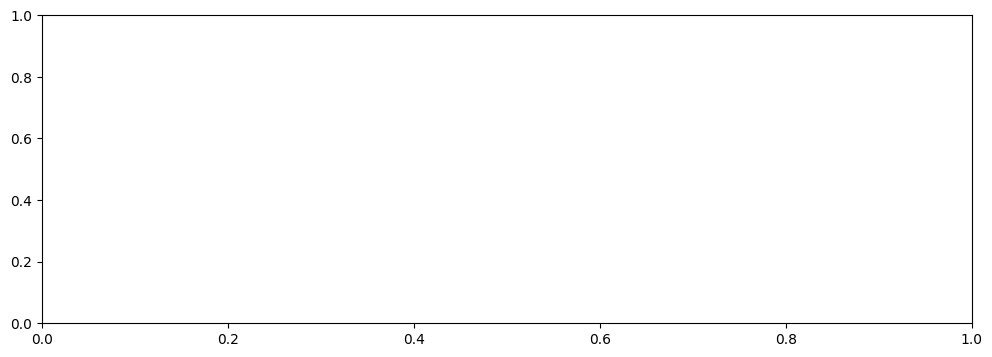

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1 = df_plume_all_200[df_plume_all_200['Growth']=='YG056']
df1 = df1[df1['plume_index']<=15 & df1['plume_index']>=300]

lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df1, ax=ax)
ax.set_xlim(0, 15)

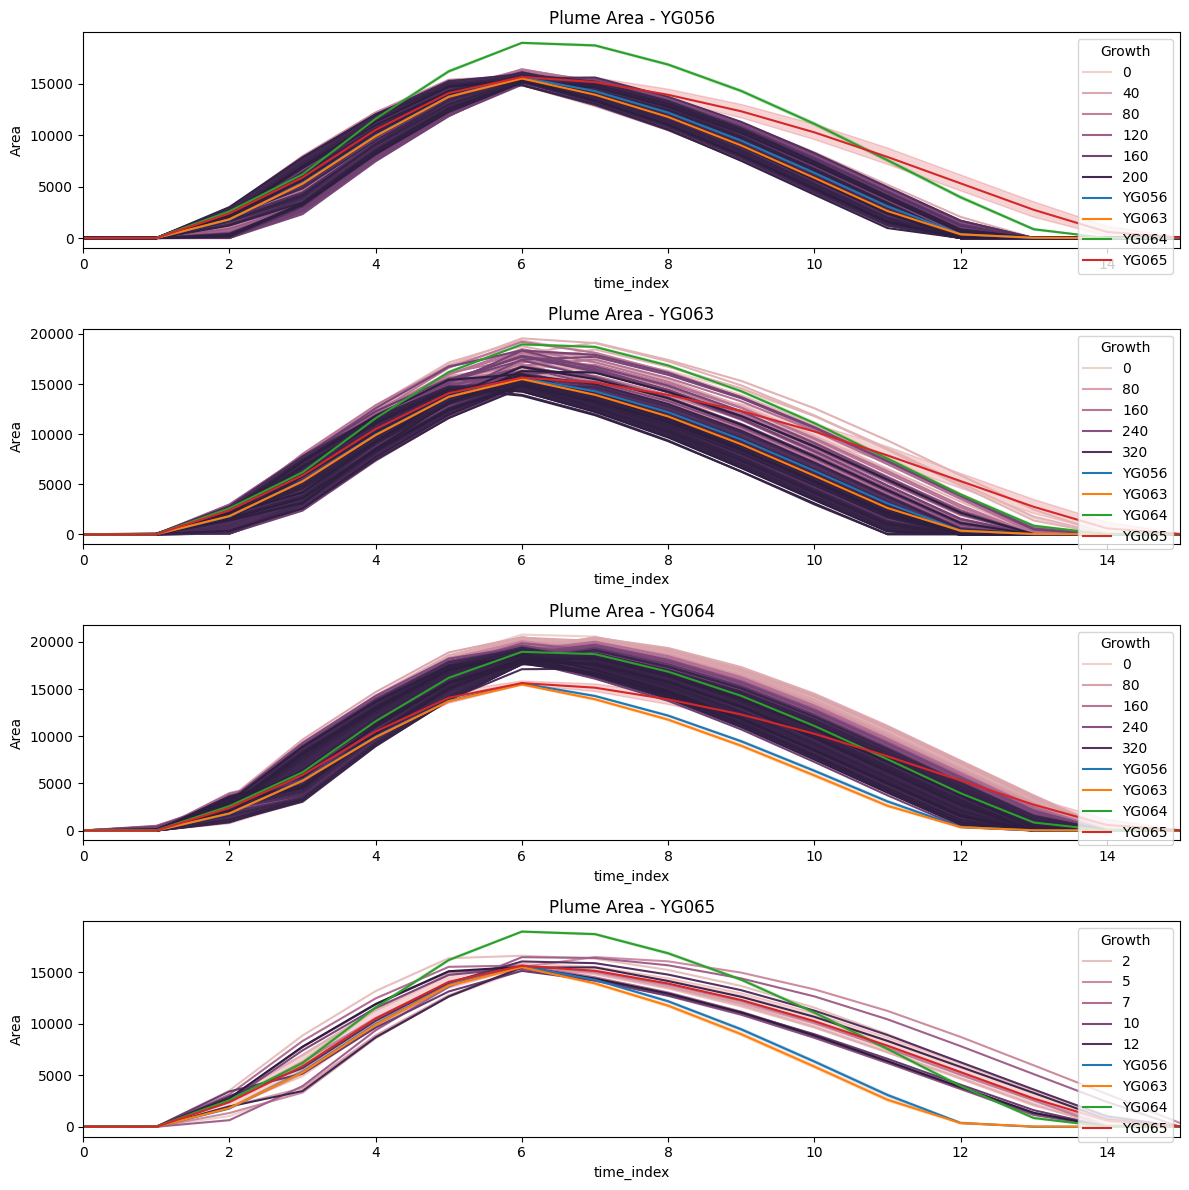

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(12, 12))

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG056'], ax=axes[0])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[0])
axes[0].set_title('Plume Area - YG056')
axes[0].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG063'], ax=axes[1])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[1])
axes[1].set_title('Plume Area - YG063')
axes[1].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG064'], ax=axes[2])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[2])
axes[2].set_title('Plume Area - YG064')
axes[2].set_xlim(0, 15)

lineplot = sns.lineplot(x="time_index", y="Area", hue="plume_index", data=df_plume_all_200[df_plume_all_200['Growth']=='YG065'], ax=axes[3])
lineplot = sns.lineplot(x="time_index", y="Area", hue="Growth", data=df_plume_all_200, ax=axes[3])
axes[3].set_title('Plume Area - YG065')
axes[3].set_xlim(0, 15)

plt.tight_layout()
plt.show()

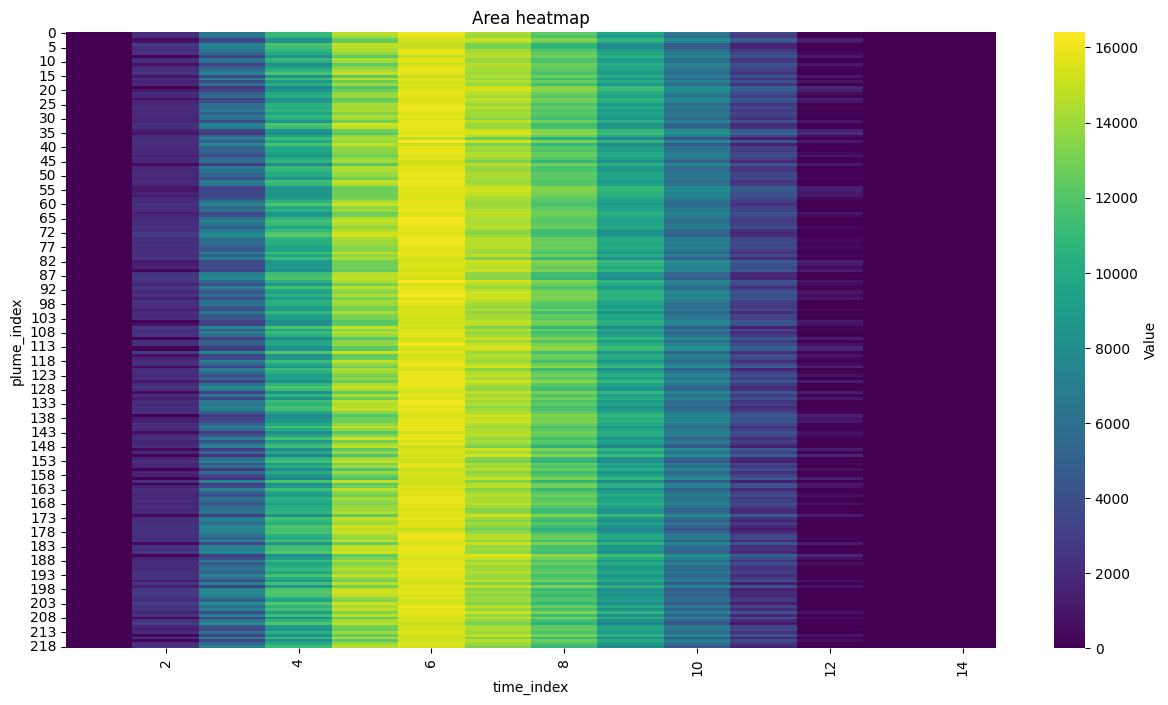

In [49]:
df_pivot = df_plume_all_200[df_plume_all_200['Growth']=='YG056'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

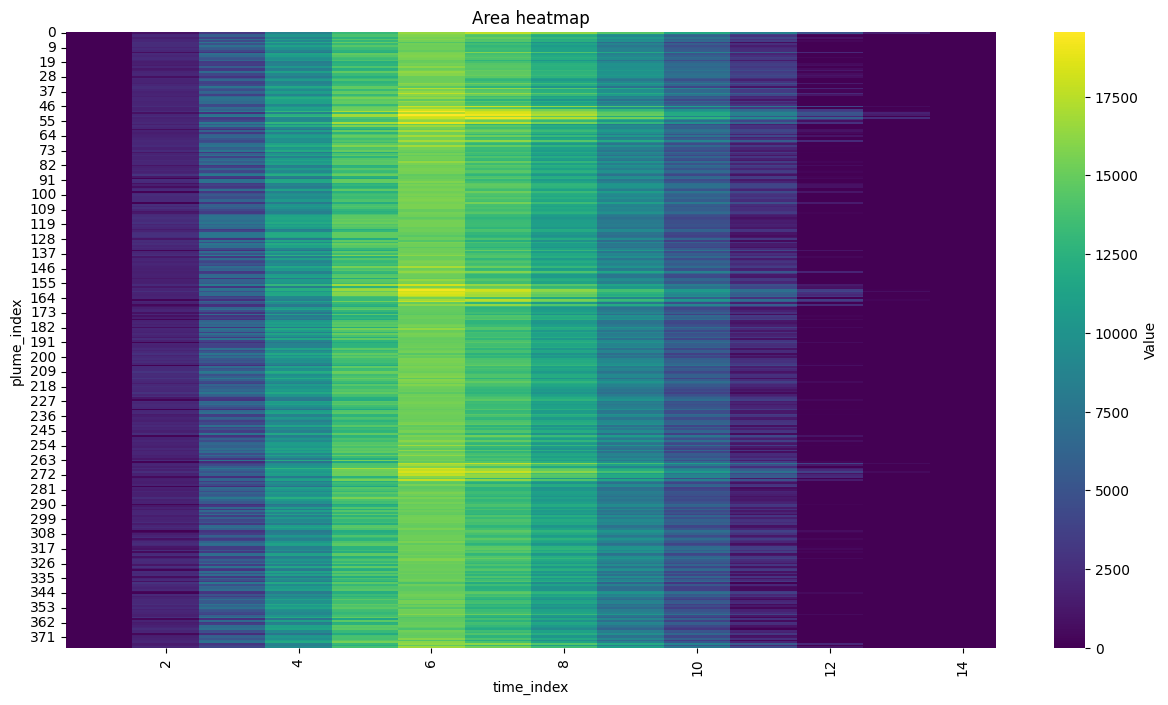

In [50]:
df_pivot = df_plume_all_200[df_plume_all_200['Growth']=='YG063'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

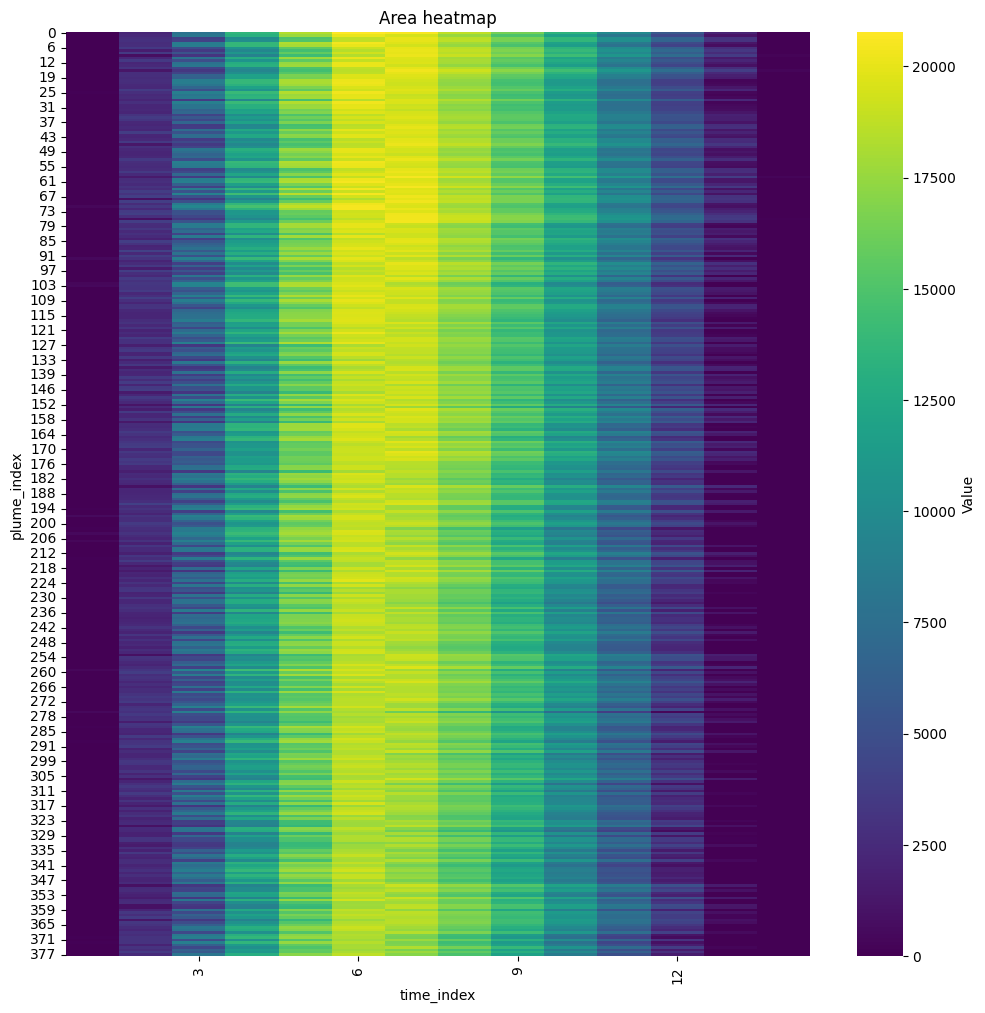

In [42]:
df_pivot = df_plume_all_200[df_plume_all_200['Growth']=='YG064'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 12))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

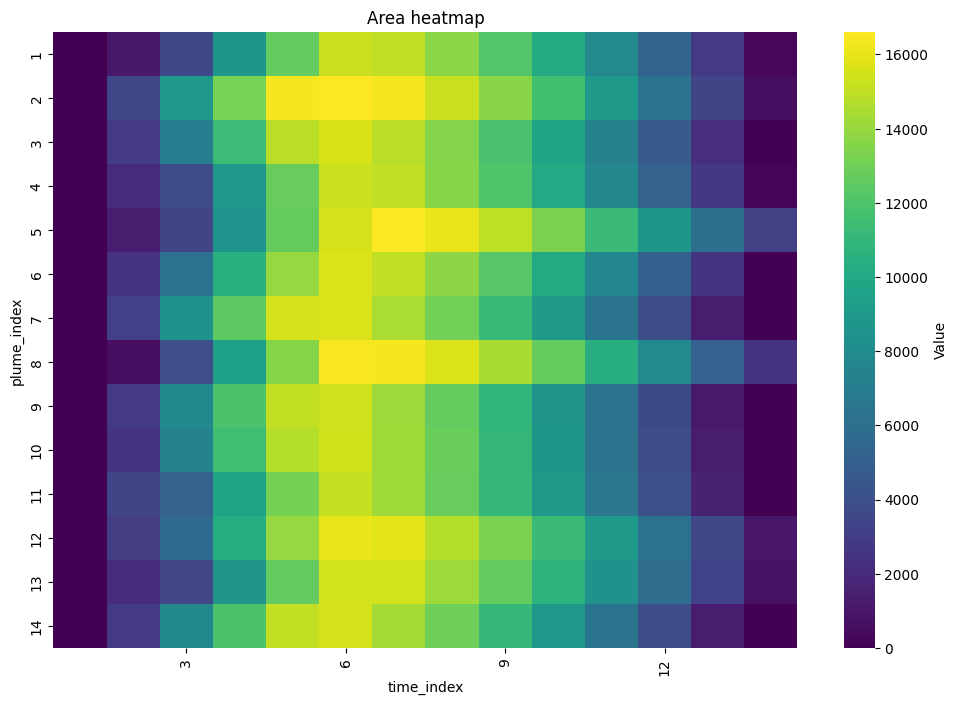

In [41]:
df_pivot = df_plume_all_200[df_plume_all_200['Growth']=='YG065'].pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

C:\Users\yig319\AppData\Local\Temp\ipykernel_62260\3866860383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plume_all_200_YG065['plume_index'] = df_plume_all_200_YG065['plume_index'] + df_plume_all_200_YG064['plume_index'].max()


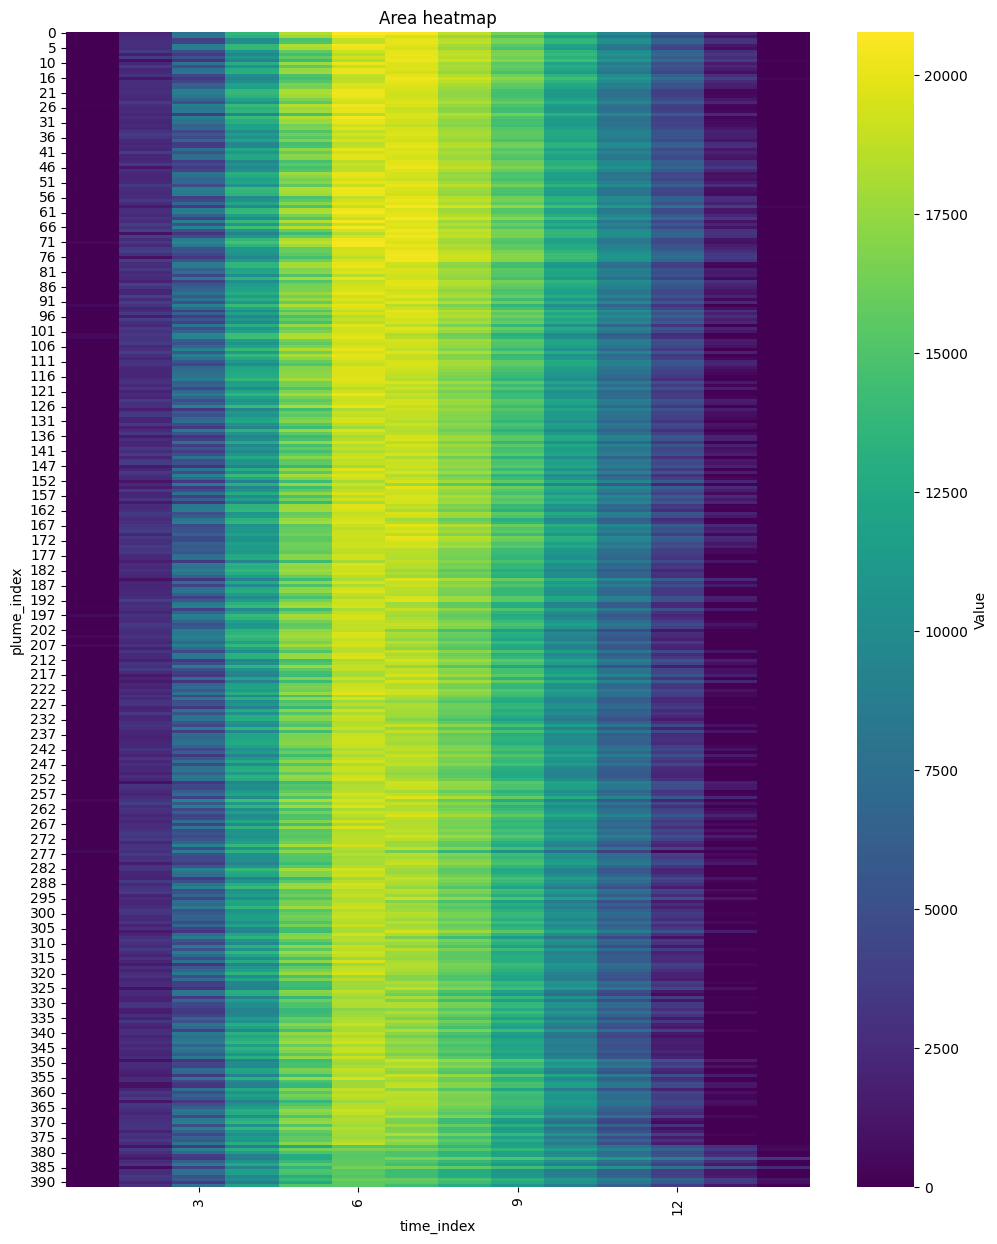

In [43]:
df_plume_all_200_YG064 = df_plume_all_200[df_plume_all_200['Growth']=='YG064']
df_plume_all_200_YG065 = df_plume_all_200[df_plume_all_200['Growth']=='YG065']
df_plume_all_200_YG065['plume_index'] = df_plume_all_200_YG065['plume_index'] + df_plume_all_200_YG064['plume_index'].max()
df_plume_all_200_YG064_065 = pd.concat([df_plume_all_200_YG064, df_plume_all_200_YG065])

df_pivot = df_plume_all_200_YG064_065.pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 15))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

In [ ]:
# Use a heatmap to visualize value trends across plumes and frames
plt.figure(figsize=(10, 6))
sns.heatmap(df_plume_all, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("Frame")
plt.ylabel("Plume")
plt.title("Plume vs Frame Heatmap")

plt.show()